In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
df_1 = pd.read_csv('Dataset/statewise_tested_numbers_data.csv')
df_2 = pd.read_csv('Dataset/state_wise_daily.csv')
df_2

FileNotFoundError: [Errno 2] File Dataset/statewise_tested_numbers_data.csv does not exist: 'Dataset/statewise_tested_numbers_data.csv'

In [ ]:
df = df_1[['State','Updated On','Total Tested','Positive','Population NCP 2019 Projection']]
#df = df.groupby('Updated On').sum()
df['% Positive'] = (df['Positive']/df['Total Tested'])*100
df['Updated On'] = pd.to_datetime(df['Updated On'], format = '%d/%m/%Y')
state = df.groupby('State').sum()
df[df.State.eq('Delhi')]

In [ ]:
from datetime import datetime
delhi_data = df[df.State.eq('Delhi')]
delhi_date = pd.to_datetime(delhi_data['Updated On'])
delhi_test = delhi_data['Total Tested']
#delhi_test.fillna(method = 'ffill',inplace = True)
delhi_positive = delhi_data['Positive']
rate = delhi_data['% Positive']
date = pd.date_range(start = '04-07-2020', end ='06-20-2020')

In [ ]:
ax = sns.lineplot(date, rate)
plt.title('Delhi Covid 19 Positivity Rate')
plt.legend(['% Positivity Rate'])
plt.xlabel("Date")
plt.ylabel('Positive Cases')
ax.set_ylim(ymin = 0)
ax.set_xticklabels(['15-April','01-May','15-May','01-June','15-June'])
plt.savefig('delhi_covid_rate.png')
plt.show()

In [ ]:
df_2

In [ ]:
data_2 = df_2[['Date','Status','DL']]
confirmed = data_2[data_2.Status.eq('Confirmed')]
deceased = data_2[data_2.Status.eq('Deceased')]
recovered = data_2[data_2.Status.eq('Recovered')]

date_2 = pd.date_range(start = '03-14-2020', end ='06-19-2020')

delhi = pd.DataFrame({'Date' : date_2.values, 'Confirmed' : confirmed['DL'].values, 'Deceased' : deceased['DL'].values, 'Recovered' : recovered['DL'].values})
delhi

In [3]:
plt.figure(fig_size = (10, 8))
ax_1 = sns.lineplot(delhi['Date'], delhi['Confirmed'], color = 'red')
sns.lineplot(delhi['Date'], delhi['Deceased'], color = 'black')
#sns.lineplot(date_2, recovered['DL'], color = 'blue')

plt.xlabel('Date')
plt.ylabel('Daily Number')
plt.legend(['Confirmed Cases','Deceased'])
plt.title('Growth Curve Covid-19 Delhi')
ax_1.set_xticklabels(['01-April','15-April','01-May','15-May','01-June','15-June','20-June'], rotation = 20)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'fig_size'

ValueError: array length 75 does not match index length 33

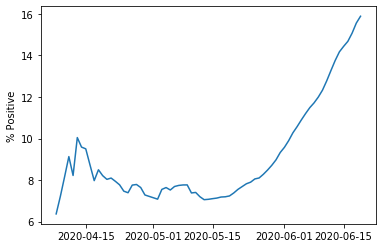

In [452]:
fig = plt.figure()
sns.lineplot(date, rate)
date = pd.date_range(start = '04-07-2020', end ='06-20-2020')
date.shape
for i in list(df['State'].unique()):
    data = df[df.State.eq(i)]
    rate = data['% Positive']
    ax =sns.lineplot(date, rate)
df[df.State.eq('Goa')]
